# **EDA_NYC_Flights_Data**
# **By Amit Kharche**
### **Follow me** on [Linkedin](https://www.linkedin.com/in/amit-kharche) and [Medium](https://medium.com/@amitkharche14) for more insights on **Data Science** and **Artificial intelligence (AI)**

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)<br>
  - **3.2** [**Upgrading Libraries**](#Section32)<br>
  - **3.3** [**Importing Libraries**](#Section33)<br>

**4.** [**Data Acquisition & Description**](#Section4)<br>
**5.** [**Data Pre-Profiling**](#Section5)<br>
**6.** [**Data Cleaning**](#Section6)<br>
**7.** [**Data Post-Profiling**](#Section7)<br>
**8.** [**Exploratory Data Analysis**](#Section8)<br>
  - [**8.1. What is the monthly distribution of flights?**](#section81)<br>
  - [**8.2. How many flights were operated by each airline?**](#section82)<br>
  - [**8.3. What is the distribution of departure delays?**](#section83)<br>
  - [**8.4. What is the average departure delay per month?**](#section84)<br>
  - [**8.5. How do departure and arrival delays relate to each other?**](#section85)<br>
  - [**8.6. What are the most frequent origin airports?**](#section86)<br>
  - [**8.7. Which routes have the highest average delays?**](#section87)<br>
  - [**8.8. What is the distribution of air time?**](#section88)<br>
  - [**8.9. How does average flight speed vary by carrier?**](#section89)<br>
  - [**8.10. What is the distribution of flights across hours of the day?**](#section810)<br>
  - [**8.11. What are the top 10 destinations from JFK?**](#section811)<br>
  - [**8.12. What is the relationship between air time and distance?**](#section812)<br>
  - [**8.13. What is the most common flight duration range?**](#section813)<br>
  - [**8.14. Which destination airports had the most flights?**](#section814)<br>
  - [**8.15. How are delays distributed per origin airport?**](#section815)<br>

**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section9.1)<br>
  - **9.2** [**Actionable Insights***](#Section9.2)<br>

---
<a name = Section1></a>
# **1. Introduction**
---
- The **NYC Flights 2013 dataset** provides a comprehensive record of all flights departing from New York City airports **JFK, LGA, and EWR** throughout the year 2013.
- Capturing data across multiple dimensions such as scheduled and actual departure/arrival times, flight delays, carriers, aircraft identifiers, and destinations, the dataset offers deep insights into the performance and reliability of air travel in one of the busiest metropolitan hubs in the world.
- With over **336,000 flights**, this data is a goldmine for analyzing **flight delays**, identifying patterns in **air traffic**, exploring the **efficiency of different airlines**, and detecting operational bottlenecks.
- Exploratory Data Analysis (EDA) on this dataset will uncover temporal, spatial, and carrier-specific trends that influence flight punctuality and customer satisfaction paving the way for data-driven improvements in aviation planning and passenger experience.

---

---
<a name = Section2></a>
# **2. Problem Statement**
---
The primary goal of this project is to conduct a detailed **Exploratory Data Analysis (EDA)** of NYC flight operations for the year **2013**. We aim to investigate patterns and anomalies across flight **delays**, **scheduling efficiency**, **carrier performance**, and **airport operations**. Specifically, the analysis will address questions such as:

* What are the common causes and patterns of **departure and arrival delays**?
* Which **airlines** and **routes** are most and least punctual?
* How do **time of day**, **day of week**, or **month** affect flight performance?
* Are there significant operational differences between **JFK**, **LGA**, and **EWR**?
* Which flights experience **the longest air times or distances**, and what does that imply?

By answering these questions, we aim to extract **actionable insights** for optimizing airline operations, enhancing passenger planning, and contributing to more reliable air travel services.


---
<center><img style="width:80%; height:300px" src="https://images.foxtv.com/static.fox5ny.com/www.fox5ny.com/content/uploads/2024/04/764/432/GettyImages-1986207874.jpg?ve=1&tl=1"  height="300" width="">

---
<a name = Section3></a>
# **3. Installing and Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
!pip install ydata_profiling

ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [2]:
!pip install -q --upgrade datascience                               # Package that is required by pandas profiling
!pip install -q --upgrade pandas-profiling                          # Library to generate basic statistics about data

ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


<a name = Section33></a>
### **3.3 Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.


In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from ydata_profiling import ProfileReport                        # To perform data profiling
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # For numerical python operations
#-------------------------------------------------------------------------------------------------------------------------------
import plotly.graph_objs as go                                      # For interactive graphs
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
import matplotlib.pyplot as plt                 # Importing pyplot interface of matplotlib
import seaborn as sns                           # Importing seaborn library for interactive visualization
%matplotlib inline

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

### **Dataset Overview**

This section focuses on understanding the structure, size, and scope of the NYC Flights 2013 dataset.

The data is sourced from **Bureau of Transportation Statistics** and comprises detailed records of all flights departing from the three major New York City airports **John F. Kennedy (JFK)**, **LaGuardia (LGA)**, and **Newark (EWR)** in the year **2013**. With **336,776 flight records**, the dataset is a robust representation of commercial air travel activity from one of the world’s busiest metro areas.

The dataset enables in-depth analysis of **flight schedules**, **delays**, **airline performance**, **aircraft usage**, and **route efficiency**. It includes temporal information (year, month, day, hour), carrier details, aircraft tail numbers, origin-destination pairs, and both scheduled and actual timings.

The data supports granular evaluations of **delay causes**, **route congestion**, **airport operations**, and **seasonal trends**, making it ideal for operational analytics and predictive modeling in aviation.

---

### **Feature Description**

| Id | Feature          | Description                                                        |
| -- | :--------------- | :----------------------------------------------------------------- |
| 01 | `year`           | Year of the flight (2013 for all records)                          |
| 02 | `month`          | Month of the flight (1 to 12)                                      |
| 03 | `day`            | Day of the month the flight departed                               |
| 04 | `dep_time`       | Actual departure time (in HHMM format, may contain missing values) |
| 05 | `sched_dep_time` | Scheduled departure time (in HHMM format)                          |
| 06 | `dep_delay`      | Departure delay in minutes (positive = late, negative = early)     |
| 07 | `arr_time`       | Actual arrival time (in HHMM format, may contain missing values)   |
| 08 | `sched_arr_time` | Scheduled arrival time (in HHMM format)                            |
| 09 | `arr_delay`      | Arrival delay in minutes (positive = late, negative = early)       |
| 10 | `carrier`        | Two-letter airline carrier code (e.g., UA, AA, DL)                 |
| 11 | `flight`         | Flight number                                                      |
| 12 | `tailnum`        | Aircraft tail number (may contain missing values)                  |
| 13 | `origin`         | Origin airport (JFK, LGA, or EWR)                                  |
| 14 | `dest`           | Destination airport code                                           |
| 15 | `air_time`       | Actual time spent in air (in minutes, may contain missing values)  |
| 16 | `distance`       | Distance between airports (in miles)                               |
| 17 | `hour`           | Scheduled departure hour (extracted from `sched_dep_time`)         |
| 18 | `minute`         | Scheduled departure minute (from `sched_dep_time`)                 |
| 19 | `time_hour`      | Rounded timestamp for scheduled departure (to nearest hour)        |

**Missing values** are primarily present in `dep_time`, `arr_time`, `dep_delay`, `arr_delay`, `air_time`, and `tailnum`, which typically occur for cancelled or diverted flights.

The dataset allows extensive analysis of **delay patterns**, **airline reliability**, **airport congestion**, and **seasonal traffic variations** in NYC airspace.

---

In [3]:
data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/amitkharche/exploratory_data_analysis_projects_amit_kharche/refs/heads/main/EDA_NYC_Flight_Data_amit_kharche/NYC_Flight_Data.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (336776, 19)


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


<a id=section301></a>
### Data Description

* Dataset has __31165 Observation__ and __9 columns__.

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,336776.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0
month,336776.0,6.548510,3.414457,1.0,4.0,7.0,10.0,12.0
day,336776.0,15.710787,8.768607,1.0,8.0,16.0,23.0,31.0
dep_time,328521.0,1349.109947,488.281791,1.0,907.0,1401.0,1744.0,2400.0
sched_dep_time,336776.0,1344.254840,467.335756,106.0,906.0,1359.0,1729.0,2359.0
dep_delay,328521.0,12.639070,40.210061,-43.0,-5.0,-2.0,11.0,1301.0
arr_time,328063.0,1502.054999,533.264132,1.0,1104.0,1535.0,1940.0,2400.0
sched_arr_time,336776.0,1536.380220,497.457142,1.0,1124.0,1556.0,1945.0,2359.0
arr_delay,327346.0,6.895377,44.633292,-86.0,-17.0,-5.0,14.0,1272.0
flight,336776.0,1971.923620,1632.471938,1.0,553.0,1496.0,3465.0,8500.0


### **Data Information**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

**Observation**

* The dataset contains **336,776 flight records** and **19 columns**, each representing various attributes of flights departing from NYC airports in 2013.
* The columns are of mixed data types: **9 integer**, **5 float**, and **5 object** (categorical or timestamp).
* **Missing values** are present in the key columns:

  * `dep_time` (8,255 missing)
  * `dep_delay` (8,255 missing)
  * `arr_time` (8,713 missing)
  * `arr_delay` and `air_time` (9,430 missing each)
  * `tailnum` (2,512 missing)
* The presence of null values in time and delay fields indicates **flight cancellations or data unavailability**.
* All **scheduled time, date, carrier, flight, airport codes, and distance columns** are **fully populated**, ensuring reliable temporal and route-based analysis.
* The dataset occupies **\~48.8 MB** in memory, making it manageable for in-memory processing using pandas.

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- Here, we will perform **Pandas Profiling before preprocessing** our dataset.


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

In [6]:
from pandas_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(data, title="Profile Report", explorative=True)

# Save the report as HTML
profile.to_file("Pre_Profiling_Report.html")

print("Profiling report saved successfully!")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 19/19 [00:07<00:00,  2.40it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Profiling report saved successfully!


---
<a name = Section6></a>
# **6. Data Cleaning**
---

In [7]:
# View missing values count per column
missing_summary = data.isnull().sum().sort_values(ascending=False)
print(missing_summary)

arr_delay         9430
air_time          9430
arr_time          8713
dep_time          8255
dep_delay         8255
tailnum           2512
year                 0
origin               0
minute               0
hour                 0
distance             0
dest                 0
carrier              0
flight               0
month                0
sched_arr_time       0
sched_dep_time       0
day                  0
time_hour            0
dtype: int64


In [8]:
# Numerical columns to fill with mean
num_cols = ['dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'air_time']
for col in num_cols:
    data[col].fillna(data[col].mean(), inplace=True)

# Categorical column to fill with mode
data['tailnum'].fillna(data['tailnum'].mode()[0], inplace=True)

In [9]:
# Speed = distance / (air_time in hours)
data['speed'] = data['distance'] / (data['air_time'] / 60)

In [11]:
import calendar

# Add readable month name
data['month_name'] = data['month'].apply(lambda x: calendar.month_abbr[x])

In [12]:
# Convert to appropriate data types if needed
data['carrier'] = data['carrier'].astype('category')
data['origin'] = data['origin'].astype('category')
data['dest'] = data['dest'].astype('category')

In [13]:
# Check if any duplicates exist
duplicates = data.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")

Duplicate Rows: 0


In [15]:
# Overview of dataset after cleaning
data.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute,speed
count,336776.0,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100,391.554210
std,0.0,3.414457,8.768607,482.260302,467.335756,39.714191,526.320657,497.457142,44.003969,1632.471938,92.367314,733.233033,4.661316,19.300846,72.231438
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000,6.769022
25%,2013.0,4.000000,8.000000,915.000000,906.000000,-5.000000,1110.000000,1124.000000,-16.000000,553.000000,84.000000,502.000000,9.000000,8.000000,354.444444
50%,2013.0,7.000000,16.000000,1349.109947,1359.000000,-1.000000,1518.000000,1556.000000,-4.000000,1496.000000,132.000000,872.000000,13.000000,29.000000,403.177570
75%,2013.0,10.000000,23.000000,1737.000000,1729.000000,12.639070,1934.000000,1945.000000,13.000000,3465.000000,188.000000,1389.000000,17.000000,44.000000,438.428571
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000,1976.156316


In [16]:
# Overview of dataset after cleaning
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   year            336776 non-null  int64   
 1   month           336776 non-null  int64   
 2   day             336776 non-null  int64   
 3   dep_time        336776 non-null  float64 
 4   sched_dep_time  336776 non-null  int64   
 5   dep_delay       336776 non-null  float64 
 6   arr_time        336776 non-null  float64 
 7   sched_arr_time  336776 non-null  int64   
 8   arr_delay       336776 non-null  float64 
 9   carrier         336776 non-null  category
 10  flight          336776 non-null  int64   
 11  tailnum         336776 non-null  object  
 12  origin          336776 non-null  category
 13  dest            336776 non-null  category
 14  air_time        336776 non-null  float64 
 15  distance        336776 non-null  int64   
 16  hour            336776 non-null  int64

<a id=section7></a>
---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

####  Pandas Profiling after Data Preprocessing

- Here, we will perform **Pandas Profiling after preprocessing** our dataset

In [17]:
from pandas_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(data, title="Profile Report", explorative=True)

# Save the report as HTML
profile.to_file("Post_Profiling_Report.html")

print("Profiling report saved successfully!")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:06<00:00,  3.13it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Profiling report saved successfully!


---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

<a id=section81></a>
**8.1. What is the monthly distribution of flights?**

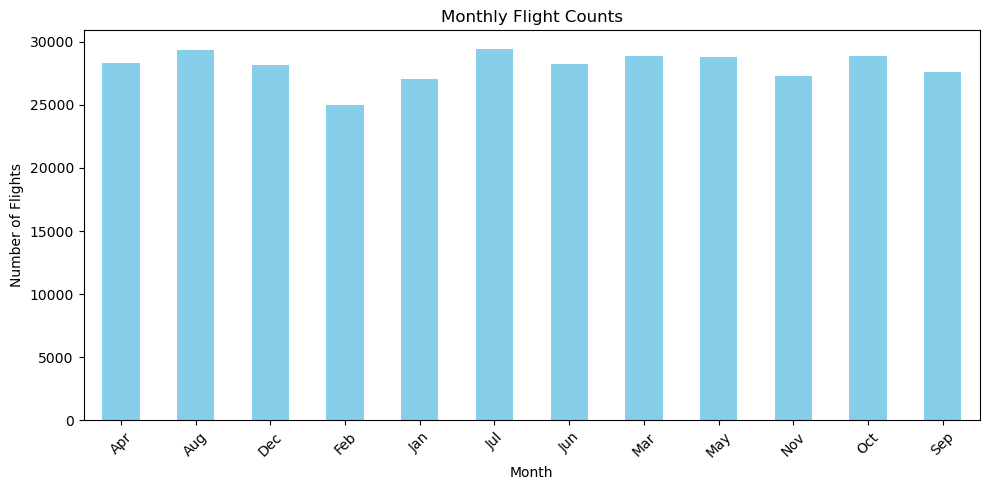

In [18]:
monthly_flight_counts = data['month_name'].value_counts().sort_index()
monthly_flight_counts.plot(kind='bar', figsize=(10, 5), color='skyblue', title='Monthly Flight Counts')
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observation:
* The **highest number of flights** occurred in **August and July**, indicating **peak travel months** during the **summer season**.
* **February** recorded the **lowest flight count**, likely due to **fewer calendar days** and **reduced winter travel**.
* Overall, **flight volume** remains **consistently high** across most months, reflecting **steady air traffic demand** throughout the year in **NYC**.


<a id=section82></a>
**8.2. How many flights were operated by each airline?**

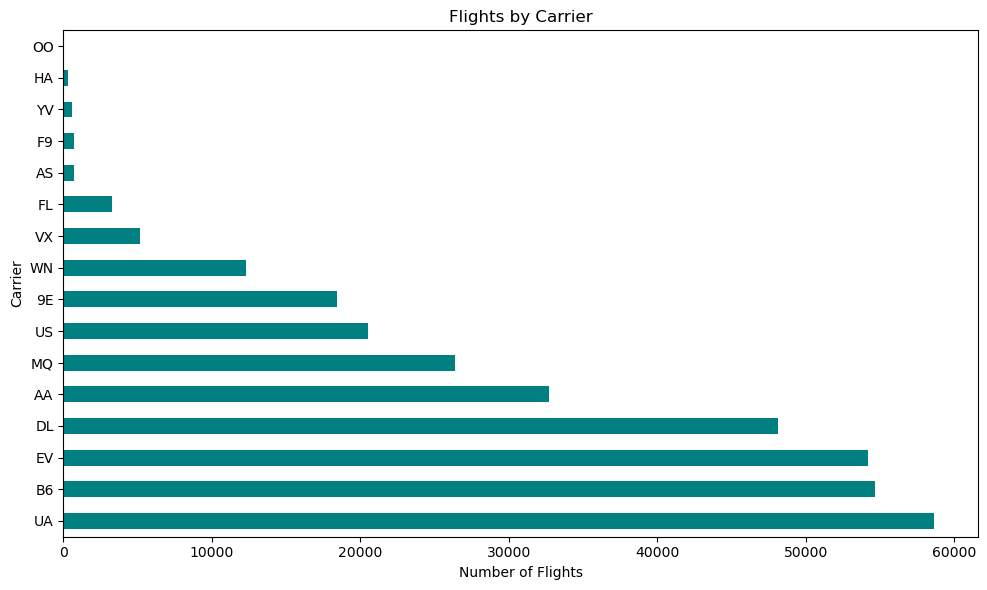

In [19]:
carrier_counts = data['carrier'].value_counts()
carrier_counts.plot(kind='barh', figsize=(10, 6), color='teal', title='Flights by Carrier')
plt.xlabel("Number of Flights")
plt.ylabel("Carrier")
plt.tight_layout()
plt.show()

### Observation:
* **United Airlines (UA)** operated the **highest number of flights**, followed closely by **JetBlue (B6)** and **ExpressJet (EV)**, highlighting their dominant presence in NYC airspace.
* **Regional and smaller carriers** like **HA, YV, F9**, and **OO** recorded the **lowest flight volumes**, indicating limited operations or niche routes.
* The overall distribution shows a **concentration of flights among a few major carriers**, with a **steep drop-off** in counts for others.


<a id=section83></a>
**8.3. What is the distribution of departure delays?**

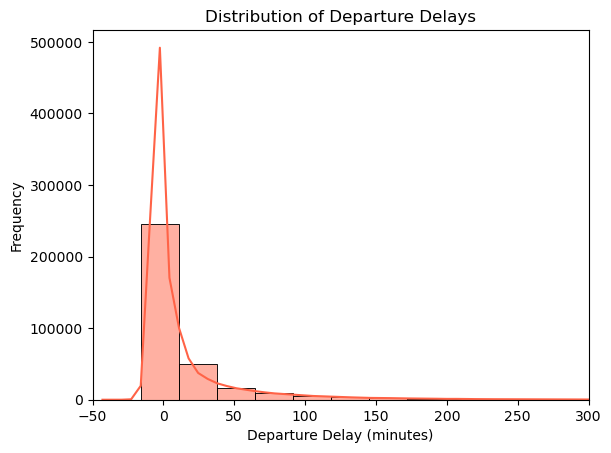

In [20]:
sns.histplot(data['dep_delay'], bins=50, kde=True, color='tomato')
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.xlim(-50, 300)
plt.show()

### Observation:
* The **distribution of departure delays** is **right-skewed**, with the majority of flights departing **on time or with minor delays** under **20 minutes**.
* A **sharp peak near zero** indicates that **most flights experience minimal delay**, while long delays are comparatively **infrequent but significant**.
* The presence of a **long tail** highlights rare instances of **extreme delays exceeding 100 minutes**, which can substantially disrupt operations.


<a id=section84></a>
**8.4. What is the average departure delay per month?**

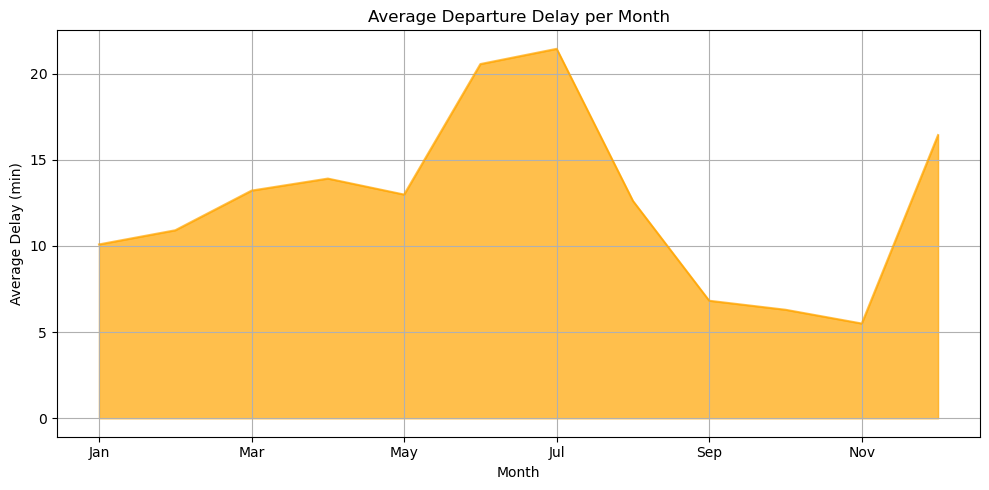

In [21]:
monthly_dep_delay = data.groupby('month_name')['dep_delay'].mean().reindex(calendar.month_abbr[1:])
monthly_dep_delay.plot(kind='area', figsize=(10, 5), color='orange', alpha=0.7, title='Average Departure Delay per Month')
plt.xlabel("Month")
plt.ylabel("Average Delay (min)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Observation:
* **June and July** recorded the **highest average departure delays**, suggesting **summer congestion or weather-related disruptions**.
* **September to November** show the **lowest average delays**, indicating **smoother operations during early fall**.
* The overall pattern reveals a **seasonal trend**, with **delays peaking in mid-year** and **dropping significantly toward year-end**.


<a id=section85></a>
**8.5. How do departure and arrival delays relate to each other?**

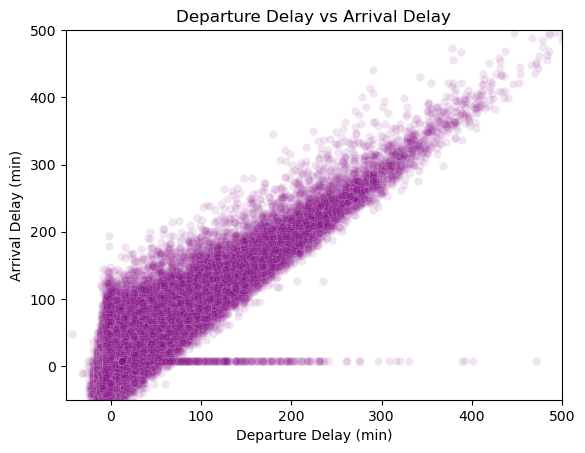

In [22]:
sns.scatterplot(x='dep_delay', y='arr_delay', data=data, alpha=0.1, color='purple')
plt.title('Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay (min)')
plt.ylabel('Arrival Delay (min)')
plt.xlim(-50, 500)
plt.ylim(-50, 500)
plt.show()

### Observation:
* There is a **strong positive correlation** between **departure delay** and **arrival delay**, indicating that **late departures often lead to late arrivals**.
* Most points cluster along a **rising diagonal trend**, showing that **longer delays on departure** tend to result in **proportionally longer delays on arrival**.
* A flat cluster at zero on the y-axis suggests that **some flights recover time** en route, **arriving on time despite late departure**.


<a id=section86></a>
**8.6. What are the most frequent origin airports?**

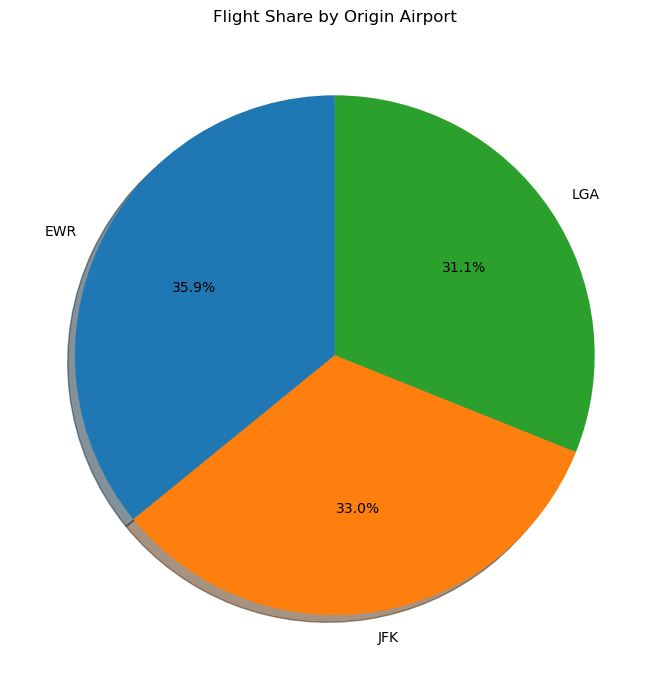

In [23]:
origin_counts = data['origin'].value_counts()
origin_counts.plot.pie(autopct='%1.1f%%', startangle=90, shadow=True, figsize=(7, 7), title='Flight Share by Origin Airport')
plt.ylabel("")
plt.tight_layout()
plt.show()

### Observation:
* **EWR (Newark Airport)** accounts for the **largest share** of flights at **35.9%**, reflecting its major role in NYC's air traffic network.
* **JFK (John F. Kennedy Airport)** contributes **33.0%** of total departures, maintaining a close second in traffic volume.
* **LGA (LaGuardia Airport)** handles **31.1%** of flights, indicating a relatively **balanced distribution** of operations across the three NYC airports.


<a id=section87></a>
**8.7. Which routes have the highest average delays?**

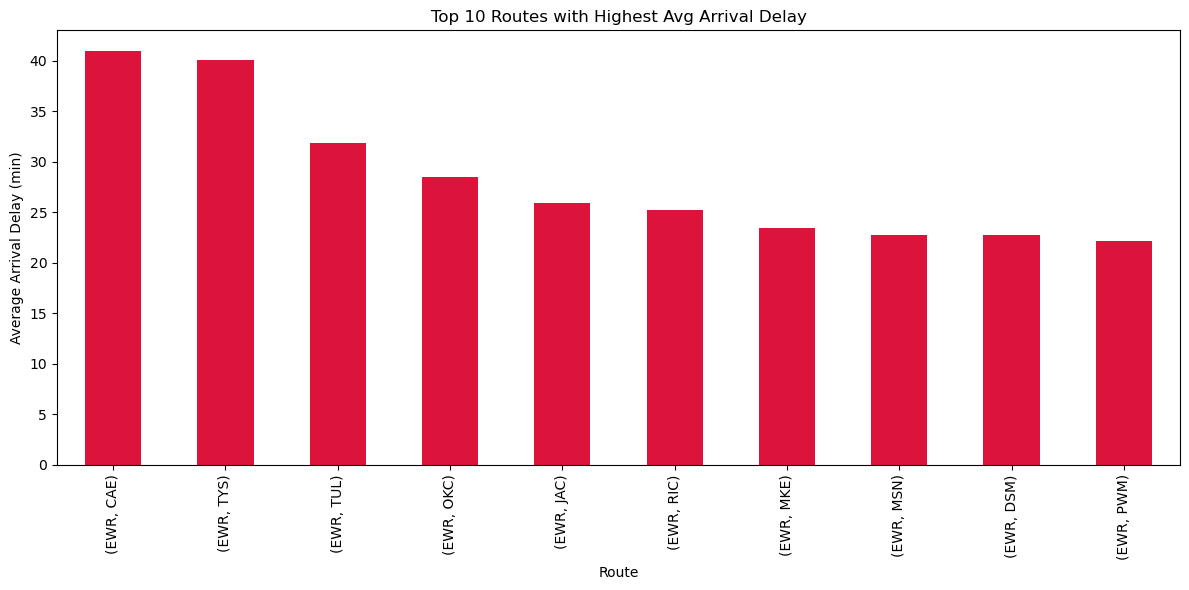

In [24]:
route_delays = data.groupby(['origin', 'dest'])['arr_delay'].mean().sort_values(ascending=False).head(10)
route_delays.plot(kind='bar', color='crimson', figsize=(12, 6), title='Top 10 Routes with Highest Avg Arrival Delay')
plt.xlabel('Route')
plt.ylabel('Average Arrival Delay (min)')
plt.tight_layout()
plt.show()

### Observation:
* Routes originating from **EWR (Newark)** dominate the **top 10 highest average arrival delays**, highlighting **systemic delays** associated with this airport.
* The **EWR–CAE** and **EWR–TYS** routes top the list with **average arrival delays exceeding 40 minutes**, indicating **frequent scheduling or congestion issues**.
* All listed routes show **average delays above 20 minutes**, emphasizing the need for **operational improvements** on these high-delay corridors.


<a id=section88></a>
**8.8. What is the distribution of air time?**

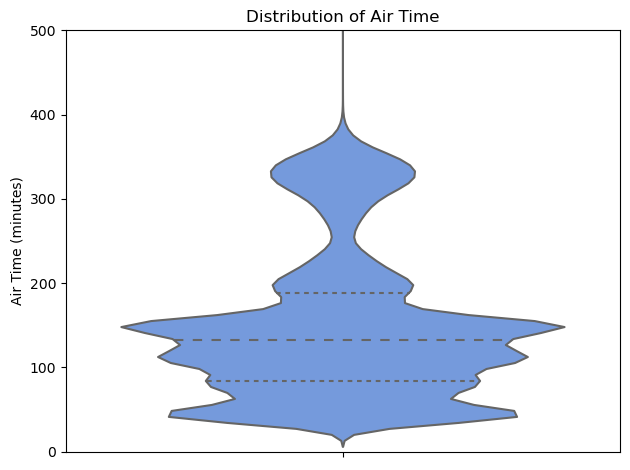

In [25]:
sns.violinplot(y='air_time', data=data, inner='quartile', color='cornflowerblue')
plt.title('Distribution of Air Time')
plt.ylabel('Air Time (minutes)')
plt.ylim(0, 500)
plt.tight_layout()
plt.show()

### Observation:
* The **distribution of air time** shows **multiple peaks**, indicating a mix of **short-haul, medium-haul, and long-haul flights** departing from NYC airports.
* Most flights have air times concentrated between **60 to 200 minutes**, representing **regional and domestic routes**.
* A few flights extend beyond **300 minutes**, signifying the presence of **long-distance or transcontinental journeys**.


<a id=section89></a>
**8.9. How does average flight speed vary by carrier?**

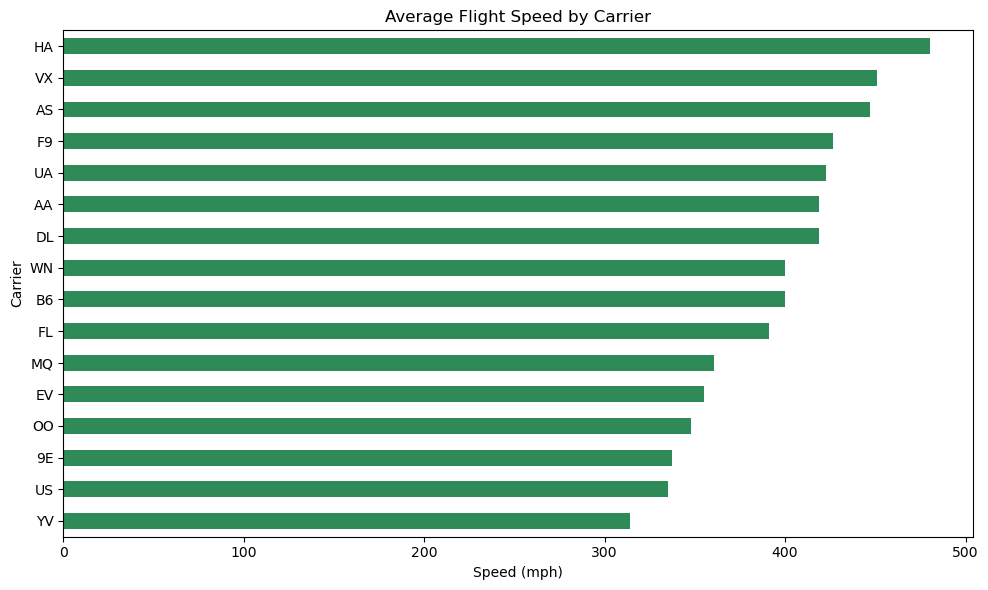

In [26]:
carrier_speed = data.groupby('carrier')['speed'].mean().sort_values()
carrier_speed.plot(kind='barh', figsize=(10, 6), color='seagreen', title='Average Flight Speed by Carrier')
plt.xlabel('Speed (mph)')
plt.ylabel('Carrier')
plt.tight_layout()
plt.show()

### Observation:
* **Hawaiian Airlines (HA)** recorded the **highest average flight speed**, likely due to **long-haul non-stop routes** with minimal air traffic congestion.
* Other carriers like **Virgin America (VX)** and **Alaska Airlines (AS)** also show **higher average speeds**, reflecting efficient operations on longer routes.
* **Regional carriers** such as **YV**, **US**, and **9E** display **lower average speeds**, which is typical of **short-haul flights** with more frequent takeoffs and landings.


<a id=section810></a>
**8.10. What is the distribution of flights across hours of the day?**

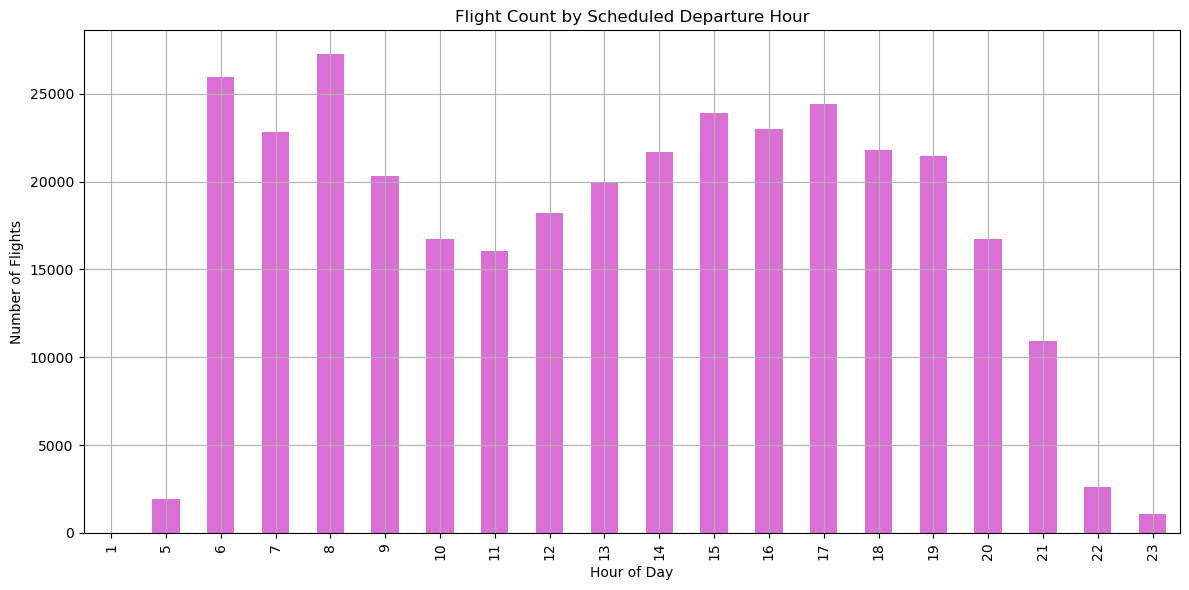

In [27]:
hourly_flights = data['hour'].value_counts().sort_index()
hourly_flights.plot(kind='bar', figsize=(12, 6), color='orchid', title='Flight Count by Scheduled Departure Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Flights')
plt.grid(True)
plt.tight_layout()
plt.show()

### Observation:

* **Early morning hours (6 AM to 9 AM)** have the **highest flight volumes**, indicating a strong preference for **morning departures**.
* **Flight activity dips** between **10 AM and 1 PM**, suggesting a **midday lull** in the schedule.
* **Evening operations** continue steadily until **8 PM**, after which there's a **sharp decline**, with minimal departures post **10 PM**.


<a id=section811></a>
**8.11. What are the top 10 destinations from JFK?**

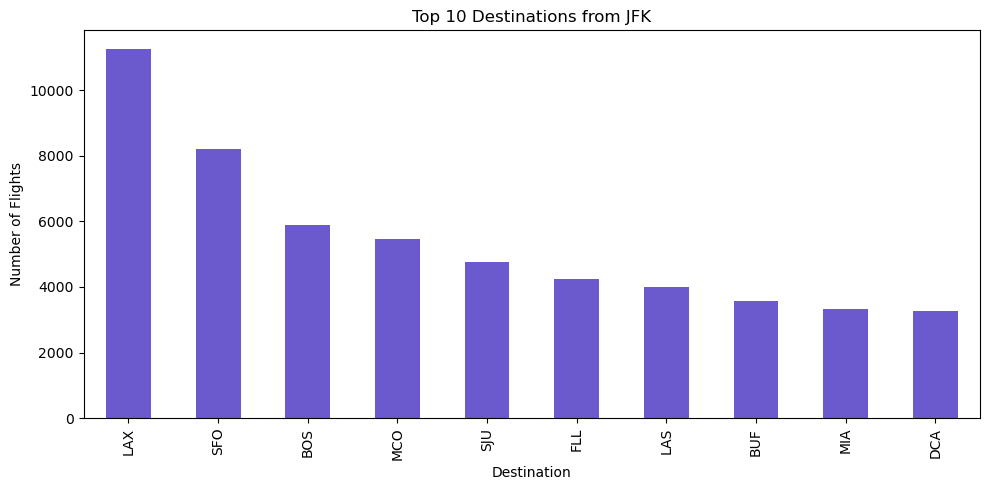

In [28]:
top_dest_jfk = data[data['origin'] == 'JFK']['dest'].value_counts().head(10)
top_dest_jfk.plot(kind='bar', color='slateblue', figsize=(10, 5), title='Top 10 Destinations from JFK')
plt.xlabel("Destination")
plt.ylabel("Number of Flights")
plt.tight_layout()
plt.show()

### Observation:
* **LAX (Los Angeles)** is the **most frequent destination** from JFK, followed by **SFO (San Francisco)**, highlighting strong **coast-to-coast connectivity**.
* Other top destinations like **BOS**, **MCO**, and **SJU** reflect a mix of **business hubs**, **tourist cities**, and **island getaways**.
* The distribution showcases JFK’s **broad national reach**, with a balance of **East Coast, West Coast**, and **Caribbean-bound flights**.


<a id=section812></a>
**8.12. What is the relationship between air time and distance?**

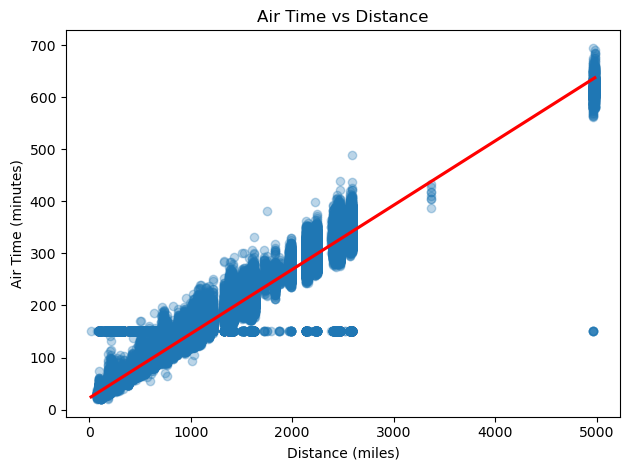

In [29]:
sns.regplot(x='distance', y='air_time', data=data, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Air Time vs Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (minutes)')
plt.tight_layout()
plt.show()

### Observation:

* The scatter plot shows a **strong linear relationship** between **distance** and **air time**, as expected — longer routes take more time in the air.
* Most data points align well with the **regression line**, confirming a **proportional increase in air time with distance**.
* Some vertical clustering suggests **standardized flight durations** for specific distance brackets, likely due to **operational scheduling or aircraft type limitations**.


<a id=section813></a>
**8.13. What is the most common flight duration range?**

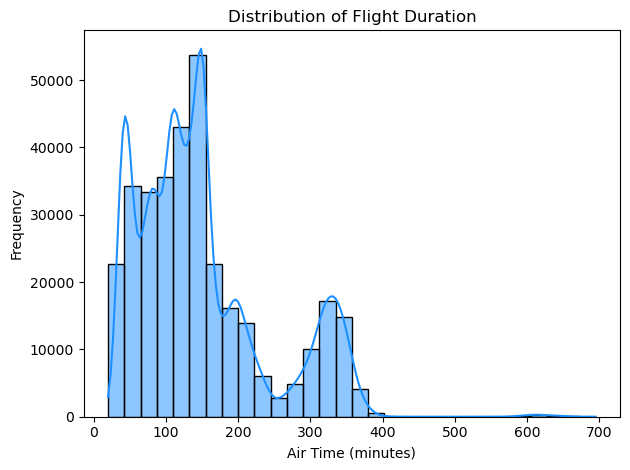

In [30]:
sns.histplot(data['air_time'], bins=30, kde=True, color='dodgerblue')
plt.title('Distribution of Flight Duration')
plt.xlabel('Air Time (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Observation
* The **distribution of flight duration** is **right-skewed**, with the **majority of flights lasting between 60 and 200 minutes**, indicating a dominance of **short to medium-haul routes**.
* Several visible peaks suggest **distinct clusters of flight durations**, possibly corresponding to **specific route types or aircraft schedules**.
* A long tail extends beyond **400 minutes**, reflecting a **small subset of long-haul flights** operating from NYC airports.


<a id=section814></a>
**8.14. Which destination airports had the most flights?**

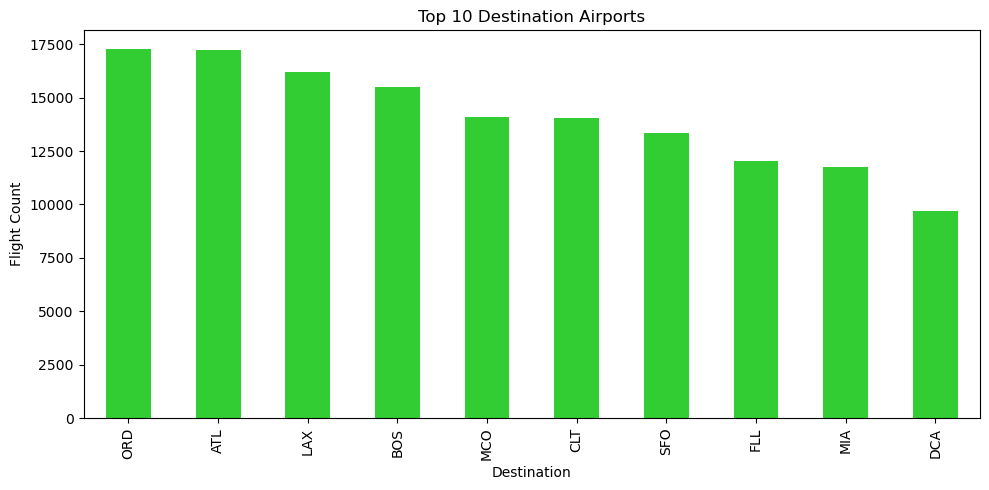

In [31]:
dest_counts = data['dest'].value_counts().head(10)
dest_counts.plot(kind='bar', color='limegreen', figsize=(10, 5), title='Top 10 Destination Airports')
plt.xlabel("Destination")
plt.ylabel("Flight Count")
plt.tight_layout()
plt.show()

### Observation:
* **ORD (Chicago O’Hare)** and **ATL (Atlanta)** are the **top two destination airports** from NYC, indicating their roles as major **national hubs**.
* Other high-frequency destinations include **LAX, BOS, and MCO**, reflecting a mix of **coastal, business, and leisure routes**.
* The overall distribution shows a **balanced spread** among key cities across the **East Coast, West Coast, and Southeast U.S.**.


<a id=section815></a>
**8.15. How are delays distributed per origin airport?**

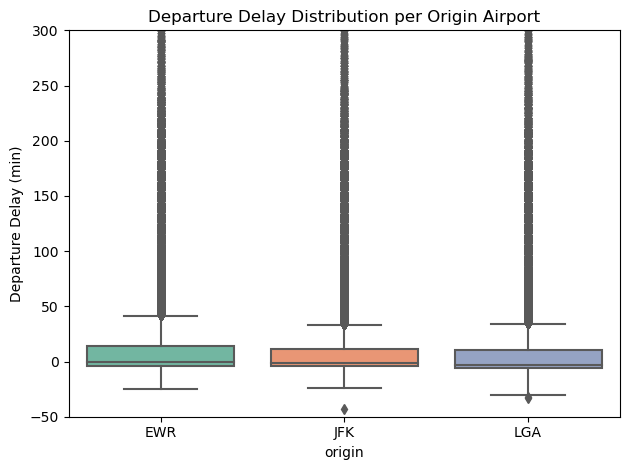

In [32]:
sns.boxplot(x='origin', y='dep_delay', data=data, palette='Set2')
plt.title('Departure Delay Distribution per Origin Airport')
plt.ylabel('Departure Delay (min)')
plt.ylim(-50, 300)
plt.tight_layout()
plt.show()

### Observation:
* All three NYC airports **EWR**, **JFK**, and **LGA**  exhibit **similar median departure delays**, with most flights departing within a **±10 minute window**.
* **EWR** shows a slightly **wider spread** and more **extreme outliers**, indicating greater variability in departure punctuality.
* Despite some high-delay outliers across all airports, the **majority of flights experience minimal delays**, reflecting overall efficient scheduling.


---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section9.1></a>
### **9.1 Conclusion**

1. The **highest number of flights** occur during **summer months** (July and August), confirming **peak travel seasons** in NYC.
2. **United Airlines (UA)** and **JetBlue (B6)** are the **most active carriers**, dominating flight traffic across all three airports.
3. The majority of **departure delays** are under **20 minutes**, but there are noticeable **long-tail outliers** with severe delays.
4. A **positive correlation** exists between **departure delay** and **arrival delay**, emphasizing that late takeoffs often lead to late landings.
5. **EWR** contributes the **largest share of departures** and also shows **higher average delays** and more **frequent route-level delays**.
6. Most flights are **short-to-medium haul**, with **air times under 200 minutes** and strong alignment between **distance and air time**.

---

<a name = Section9.2></a>
### **9.2 Actionable Insights**
1. **Operational focus** should be intensified at **EWR**, particularly for high-delay routes like **EWR–CAE** and **EWR–TYS**, to reduce overall system delay impact.
2. Introduce **predictive delay models** using **departure time and distance** to better forecast arrival times and manage expectations.
3. **Morning flights (6–9 AM)** are in high demand consider **capacity planning, staffing, and gate availability improvements** during these hours.
4. Airlines with **lower average speeds** (e.g., regional carriers) can be optimized for **efficiency or better fleet utilization** across route types.
5. Develop **targeted delay mitigation strategies** for **summer months**, including buffer scheduling and proactive maintenance.
6. Leverage JFK’s and LGA’s **more consistent departure patterns** as **benchmarks** for improving reliability at EWR.
